# TEAM-KMJS (a.k.a Team Sasa)     
### Sprint4 - News 

In [4]:
import spacy
import en_core_web_lg

import gensim 
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from gensim.summarization.summarizer import summarize

import pyLDAvis.gensim

import numpy as np 
import pandas as pd
import math 

import matplotlib.pyplot as plt 
from wordcloud import WordCloud 

from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob 
# https://www.loc.gov/standards/iso639-2/php/code_list.php

import sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

from collections import  Counter
import string, os, re, operator, warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\Optiplex\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Optiplex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Optiplex\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Optiplex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Optiplex\anaconda3\lib\site-packages\sumy\models\tf.py:9: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 

In [5]:
print(f'SpaCy:\t{spacy.__version__}')
print(f'en_core_web_lg:\t{en_core_web_lg.__version__}')
print(f'NLTK:\t{nltk.__version__}')
print(f'gensim:\t{gensim.__version__}')

SpaCy:	3.0.3
en_core_web_lg:	3.0.0
NLTK:	3.5
gensim:	3.8.3


In [6]:

### NLP Model
# NLP = en_core_web_lg.load()
NLP = spacy.load('en_core_web_lg', disable=['parser', 'ner'])


### Stop Words
STOPWORDS = stopwords.words('english')
STOPWORDS.extend(['news', 'advertisement', 'rappler', 'gma', 'inquirer', 'manila', 'philippines', 'philippine', 'bulletin', 'star',\
    'cnn', 'abs', 'cbn', 'abscbn', 'abs-cbn', 'sunstar', 'covid', 'covid-19', 'covid19', 'vaccine', 'say'])
TAGALOG = set(
    """
akin
aking
ako
alin
am
amin
aming
ang
ano
anumang
apat
at
atin
ating
ay
bababa
bago
bakit
bawat
bilang
dahil
dalawa
dapat
din
dito
doon
gagawin
gayunman
ginagawa
ginawa
ginawang
gumawa
gusto
habang
hanggang
hindi
huwag
iba
ibaba
ibabaw
ibig
ii
ikaw
ilagay
ilalim
ilan
inyong
isa
isang
itaas
ito
iyo
iyon
iyong
ka
kahit
kailangan
kailanman
kami
kanila
kanilang
kanino
kanya
kanyang
kapag
kapwa
karamihan
katiyakan
katulad
kaya
kaysa
ko
kong
kulang
kumuha
kung
laban
lahat
lamang
likod
lima
maaari
maaaring
maging
mahusay
makita
marami
marapat
masyado
may
mayroon
mga
minsan
mismo
mula
muli
na
nabanggit
naging
nagkaroon
nais
nakita
namin
napaka
narito
nasaan
ng
ngayon
ni
nila
nilang
nito
niya
niyang
noon
o
pa
paano
pababa
paggawa
pagitan
pagkakaroon
pagkatapos
palabas
pamamagitan
panahon
pangalawa
para
paraan
pareho
pataas
pero
pumunta
pumupunta
sa
saan
sabi
sabihin
sarili
sila
sino
siya
tatlo
tayo
tulad
tungkol
una
walang
""".split()
)

STOPWORDS.extend(TAGALOG)
print(STOPWORDS)

### Doc Object
def get_doc(text):
    docstring =  str(''.join([i if ord(i) < 128 else ' ' for i in text]))
    return NLP(docstring)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
FILENAME = 'datasets/combined_and_cleaned.csv'

df = pd.read_csv(FILENAME)
# df['published_dates'] = pd.to_datetime(df['published_dates'])

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   urls              2528 non-null   object
 1   titles            2528 non-null   object
 2   authors           2528 non-null   object
 3   published_dates   2528 non-null   object
 4   articles_content  2528 non-null   object
 5   news_org          2528 non-null   object
dtypes: object(6)
memory usage: 118.6+ KB


,urls,titles,authors,published_dates,articles_content,news_org
0,https://www.rappler.com/newsbreak/explainers/w...,Here’s why COVID-19 vaccines haven’t arrived i...,SOFIA TOMACRUZ,2021-02-18 09:22:00,"MANILA, PHILIPPINES\r\nThe Philippine governme...",Rappler
1,https://www.rappler.com/newsbreak/iq/timeline-...,TIMELINE: The Philippines’ 2021 COVID-19 vacci...,SOFIA TOMACRUZ,2021-02-04 19:43:00,"MANILA, PHILIPPINES\r\n(UPDATED) On March 1, t...",Rappler
2,https://www.rappler.com/nation/philippines-rec...,"After initial delay, Philippines to receive As...",SOFIA TOMACRUZ,2021-03-03 14:41:00,"MANILA, PHILIPPINES\r\n(UPDATED) Malacañang sa...",Rappler
3,https://www.rappler.com/nation/philippines-gra...,Philippines grants emergency approval for Sino...,SOFIA TOMACRUZ,2021-02-22 12:19:00,"MANILA, PHILIPPINES\r\n(UPDATED) Its lower eff...",Rappler
4,https://www.rappler.com/nation/philippines-rec...,Philippines receives first COVID-19 vaccine de...,SOFIA TOMACRUZ,2021-02-28 16:16:00,"MANILA, PHILIPPINES\r\n(3rd UPDATE) The arriva...",Rappler
...,...,...,...,...,...,...
2523,https://mb.com.ph/2020/03/07/virus-folding-puz...,Virus-folding puzzle game might help find vacc...,manilabulletin_admin,"March 7, 2020, 12:00 AM",By Rizal ObanilThis development has the making...,manilabulletin
2524,https://mb.com.ph/2020/02/25/needed-vaccine-in...,Needed: vaccine & info on how Covid-1 spreads,manilabulletin_admin,"February 25, 2020, 12:00 AM","The search for a vaccine for the coronavirus, ...",manilabulletin
2525,https://mb.com.ph/2020/02/22/phap-to-immediate...,PHAP to immediately bring new COVID-19 vaccine...,manilabulletin_admin,"February 22, 2020, 12:00 AM",By Bernie Cahiles-MagkilatThe Pharmaceutical A...,manilabulletin
2526,https://mb.com.ph/2020/02/14/as-scientists-rac...,As scientists race to produce Covid-19 vaccine...,manilabulletin_admin,"February 14, 2020, 12:00 AM",By Analou De VeraAn official of the World Heal...,manilabulletin


# TOPIC MODELING
### https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

## Tokenize words and Clean-up text


In [44]:
# Convert to list
data = df['articles_content'].values.tolist()

# Convert R&D to Research and Development
data = [sent.lower().replace('r&d', 'Research and Development') for sent in data]

# Remove URLs
data = [re.sub("(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))", '', sent) for sent in data]

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = list(sent_to_words(data))
print(data[:1])


[['manila', 'philippines', 'the', 'philippine', 'government', 'needs', 'key', 'measure', 'on', 'indemnification', 'funds', 'to', 'be', 'signed', 'into', 'law', 'philippine', 'pandemic', 'officials', 'announced', 'the', 'delivery', 'of', 'the', 'country', 'first', 'batch', 'of', 'coronavirus', 'vaccines', 'could', 'be', 'expected', 'by', 'mid', 'february', 'but', 'with', 'that', 'timeline', 'looking', 'less', 'likely', 'to', 'be', 'met', 'the', 'duterte', 'government', 'task', 'force', 'officials', 'announced', 'there', 'would', 'be', 'slight', 'delay', 'in', 'the', 'arrival', 'of', 'vaccines', 'due', 'to', 'of', 'all', 'things', 'paperwork', 'vaccine', 'czar', 'carlito', 'galvez', 'jr', 'and', 'national', 'task', 'force', 'covid', 'deputy', 'chief', 'implementer', 'vince', 'dizon', 'pointed', 'to', 'documentary', 'requirements', 'involving', 'an', 'indemnification', 'fund', 'as', 'the', 'culprit', 'behind', 'the', 'delayed', 'schedule', 'why', 'do', 'we', 'need', 'an', 'indemnification

## Text Summrization

In [45]:
NUM_SENTENCES = 7

def build_summary(text):
    parser = PlaintextParser.from_string(text, Tokenizer('english'))
    lexranksummarizer = LexRankSummarizer()
    summary = lexranksummarizer(parser.document, sentences_count=NUM_SENTENCES)
    # print(f'\n\n1\t{ret[0]}')
    # print(f'2\t{ret[1]}')
    # print(f'7\t{ret[1]}')
    summary_text = ''
    for s in summary:
        summary_text += str(s)
    # print (summary_text)
    return summary_text
    
df['articles_summary'] = df['articles_content'].apply(build_summary)
print(df[['articles_content','articles_summary']].isna().sum())
df[['articles_content','articles_summary']]

articles_content    0
articles_summary    0
dtype: int64


,articles_content,articles_summary
0,"MANILA, PHILIPPINES\r\nThe Philippine governme...",Why do we need an indemnification fund?An inde...
1,"MANILA, PHILIPPINES\r\n(UPDATED) On March 1, t...","Now, the Philippines is just weeks away from s..."
2,"MANILA, PHILIPPINES\r\n(UPDATED) Malacañang sa...","(UPDATED) Malacañang says 487,200 doses from t..."
3,"MANILA, PHILIPPINES\r\n(UPDATED) Its lower eff...",FDA Director General Eric Domingo made the ann...
4,"MANILA, PHILIPPINES\r\n(3rd UPDATE) The arriva...",(3rd UPDATE) The arrival of donated COVID-19 v...
...,...,...
2523,By Rizal ObanilThis development has the making...,By Rizal ObanilThis development has the making...
2524,"The search for a vaccine for the coronavirus, ...","The search for a vaccine for the coronavirus, ..."
2525,By Bernie Cahiles-MagkilatThe Pharmaceutical A...,By Bernie Cahiles-MagkilatThe Pharmaceutical A...
2526,By Analou De VeraAn official of the World Heal...,By Analou De VeraAn official of the World Heal...


## Creating Bigram and Trigram Models

In [46]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data[0]]])

['manila', 'philippines', 'the', 'philippine', 'government', 'needs', 'key', 'measure', 'on', 'indemnification', 'funds', 'to', 'be', 'signed', 'into', 'law', 'philippine', 'pandemic', 'officials', 'announced', 'the', 'delivery', 'of', 'the', 'country', 'first', 'batch', 'of', 'coronavirus', 'vaccines', 'could', 'be', 'expected', 'by', 'mid_february', 'but', 'with', 'that', 'timeline', 'looking', 'less', 'likely', 'to', 'be', 'met', 'the', 'duterte', 'government', 'task_force', 'officials', 'announced', 'there', 'would', 'be', 'slight', 'delay', 'in', 'the', 'arrival', 'of', 'vaccines', 'due', 'to', 'of', 'all', 'things', 'paperwork', 'vaccine', 'czar_carlito_galvez_jr', 'and', 'national', 'task_force', 'covid', 'deputy_chief_implementer_vince', 'dizon', 'pointed', 'to', 'documentary_requirements', 'involving', 'an', 'indemnification_fund', 'as', 'the', 'culprit', 'behind', 'the', 'delayed', 'schedule', 'why', 'do', 'we', 'need', 'an', 'indemnification_fund', 'an', 'indemnification_fun

## Remove Stopwords, Make Bigrams and Lemmatize


In [47]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in STOPWORDS] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    # https://spacy.io/api/annotation
    texts_out = []
    for sent in texts:
        doc = NLP(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


In [48]:
# Do lemmatization keeping only noun, adj, vb, adv
data = lemmatization(data)

# Remove Stop Words
data = remove_stopwords(data)
# data = remove_stopwords(data)
# data = remove_stopwords(data)

# Form Bigrams | Trigrams
data = make_bigrams(data)

#### NOTE: lemmatization was move to first pass
# # Do lemmatization keeping only noun, adj, vb, adv
# data = lemmatization(data)

print(data[:1])

[['government', 'need', 'key', 'measure', 'indemnification_fund', 'sign', 'law', 'pandemic', 'official', 'announce', 'delivery', 'country', 'first', 'batch', 'coronavirus', 'expect', 'mid_february', 'timeline', 'look', 'less', 'likely', 'meet', 'duterte', 'government', 'task_force', 'official', 'announce', 'slight', 'delay', 'arrival', 'thing', 'paperwork', 'czar', 'galvez_jr', 'national', 'task_force', 'deputy_chief', 'implementer_vince', 'dizon', 'point', 'documentary', 'requirement', 'involve', 'indemnification_fund', 'culprit', 'delay', 'schedule', 'need', 'indemnification_fund', 'indemnification_fund', 'galvez', 'early', 'tell', 'lawmaker', 'congressional', 'hearing', 'necessary', 'gain_access', 'dose', 'pharmaceutical_company', 'well', 'global', 'facility', 'request', 'lawmaker', 'consider', 'bill', 'provide', 'mid', 'january', 'add', 'give', 'opportunity', 'gain_access', 'large', 'supply', 'increase', 'public', 'confidence', 'government', 'rollout', 'reason', 'indemnification_fu

### Create the Dictionary and Corpus needed for Topic Modeling

In [49]:
# Create Dictionary
id2word_dictionary = Dictionary(data)

# Create Corpus
texts = data

# Term Document Frequency
corpus = [id2word_dictionary.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Human readable format of corpus (term-frequency)
# [(id2word_dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[(0, 2), (1, 1), (2, 2), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 3), (10, 4), (11, 1), (12, 8), (13, 1), (14, 1), (15, 1), (16, 1), (17, 3), (18, 5), (19, 1), (20, 1), (21, 2), (22, 1), (23, 2), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 3), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 12), (42, 1), (43, 5), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 3), (58, 1), (59, 1), (60, 1), (61, 1), (62, 9), (63, 1), (64, 2), (65, 3), (66, 1), (67, 1), (68, 1), (69, 1), (70, 6), (71, 3), (72, 1), (73, 3), (74, 1), (75, 2), (76, 1), (77, 1), (78, 3), (79, 1), (80, 2), (81, 3), (82, 2), (83, 1), (84, 1), (85, 1), (86, 3), (87, 1), (88, 2), (89, 3), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 2), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 2), (104, 1), (105, 2), (106, 2), (107, 3), (108, 4), (109, 1), (110, 1

## Building the Topic Model

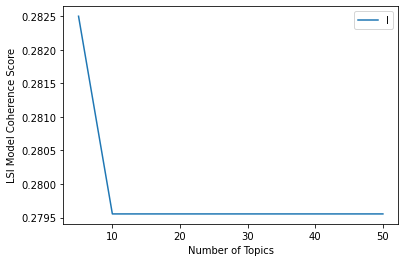


LSI coherence scores
LSI Model[0] ~> N-Topics ~>  5 has Coherence Value of ~> 0.2825
LSI Model[1] ~> N-Topics ~> 10 has Coherence Value of ~> 0.2796
LSI Model[2] ~> N-Topics ~> 15 has Coherence Value of ~> 0.2796
LSI Model[3] ~> N-Topics ~> 20 has Coherence Value of ~> 0.2796
LSI Model[4] ~> N-Topics ~> 25 has Coherence Value of ~> 0.2796
LSI Model[5] ~> N-Topics ~> 30 has Coherence Value of ~> 0.2796
LSI Model[6] ~> N-Topics ~> 35 has Coherence Value of ~> 0.2796
LSI Model[7] ~> N-Topics ~> 40 has Coherence Value of ~> 0.2796
LSI Model[8] ~> N-Topics ~> 45 has Coherence Value of ~> 0.2796
LSI Model[9] ~> N-Topics ~> 50 has Coherence Value of ~> 0.2796





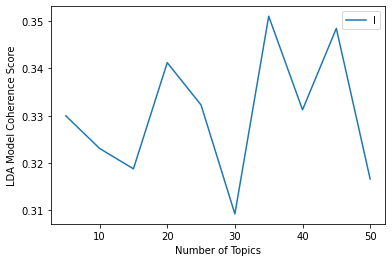



LDA coherence scores
LDA Model[0] ~> N-Topics ~>  5 has Coherence Value of ~> 0.33
LDA Model[1] ~> N-Topics ~> 10 has Coherence Value of ~> 0.3231
LDA Model[2] ~> N-Topics ~> 15 has Coherence Value of ~> 0.3188
LDA Model[3] ~> N-Topics ~> 20 has Coherence Value of ~> 0.3412
LDA Model[4] ~> N-Topics ~> 25 has Coherence Value of ~> 0.3323
LDA Model[5] ~> N-Topics ~> 30 has Coherence Value of ~> 0.3093
LDA Model[6] ~> N-Topics ~> 35 has Coherence Value of ~> 0.351
LDA Model[7] ~> N-Topics ~> 40 has Coherence Value of ~> 0.3313
LDA Model[8] ~> N-Topics ~> 45 has Coherence Value of ~> 0.3485
LDA Model[9] ~> N-Topics ~> 50 has Coherence Value of ~> 0.3166
Wall time: 4min 29s


In [52]:
%%time 

limit = 51; start = 5; step = 5
lsicoherences = []
lsimodels = []
ldacoherences = []
ldamodels = []

for N in range(start, limit, step):
    # LSI
    lsimodel = LsiModel(corpus=corpus, num_topics=N, id2word=id2word_dictionary)
    lsimodels.append(lsimodel)
    lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]
    lsicoherence = CoherenceModel(topics=lsitopics[:10], texts=texts, dictionary=id2word_dictionary, window_size=10).get_coherence()
    lsicoherences.append((lsicoherence))
    # LDA
    ldamodel = LdaModel(corpus=corpus, num_topics=N, id2word=id2word_dictionary, random_state = 2)
    ldamodels.append(ldamodel)
    ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]
    ldacoherence = CoherenceModel(topics=ldatopics[:10], texts=texts, dictionary=id2word_dictionary, window_size=10).get_coherence()
    ldacoherences.append((ldacoherence))

# HDP
#hdpmodel = HdpModel(corpus=corpus, id2word=id2word_dictionary)
#hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]
#hdpcoherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=id2word_dictionary, window_size=10).get_coherence()


# Plot the number of topics based on LSI coherence score
x = range(start, limit, step)
plt.plot(x, lsicoherences)
plt.xlabel('Number of Topics')
plt.ylabel('LSI Model Coherence Score')
plt.legend('lsicoherences', loc='best')
plt.show()  
# Print the LSI coherence scores
print('\nLSI coherence scores')
idx = 0
for n, cv in zip(x, lsicoherences):
    print(f'LSI Model[{idx}] ~> N-Topics ~> {n:2} has Coherence Value of ~> {round(cv, 4)}')
    idx += 1

print('\n\n')

# Plot the number of topics based on LDA coherence score
x = range(start, limit, step)
plt.plot(x, ldacoherences)
plt.xlabel('Number of Topics')
plt.ylabel('LDA Model Coherence Score')
plt.legend('ldacoherences', loc='best')
plt.show()  
# Print the LDA coherence scores
print('\n\nLDA coherence scores')
idx = 0
for n, cv in zip(x, ldacoherences):
    print(f'LDA Model[{idx}] ~> N-Topics ~> {n:2} has Coherence Value of ~> {round(cv, 4)}')
    idx += 1

In [51]:
def evaluate_coherence_bargraph(coherences, indices):
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.3, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')
    plt.title('Topic Model Performance')
    plt.show
    
evaluate_coherence_bargraph([lsicoherences[2], ldacoherences[2], hdpcoherence], ['LSI', 'LDA', 'HDP'])

IndexError: list index out of range

In [ ]:
# INTENTIONAL EXCEPTION
raise Exception('Select the BEST MODELS')

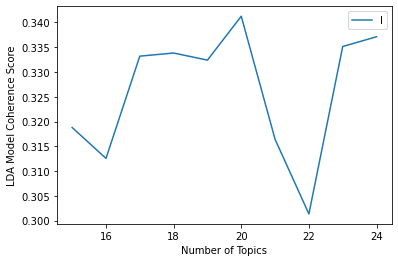



LDA coherence scores
LDA Model[0] ~> N-Topics ~> 15 has Coherence Value of ~> 0.3188
LDA Model[1] ~> N-Topics ~> 16 has Coherence Value of ~> 0.3126
LDA Model[2] ~> N-Topics ~> 17 has Coherence Value of ~> 0.3332
LDA Model[3] ~> N-Topics ~> 18 has Coherence Value of ~> 0.3338
LDA Model[4] ~> N-Topics ~> 19 has Coherence Value of ~> 0.3324
LDA Model[5] ~> N-Topics ~> 20 has Coherence Value of ~> 0.3412
LDA Model[6] ~> N-Topics ~> 21 has Coherence Value of ~> 0.3164
LDA Model[7] ~> N-Topics ~> 22 has Coherence Value of ~> 0.3014
LDA Model[8] ~> N-Topics ~> 23 has Coherence Value of ~> 0.3351
LDA Model[9] ~> N-Topics ~> 24 has Coherence Value of ~> 0.3371
Wall time: 2min 32s


In [53]:
%%time 
#Narrowing it down, using what was identified above change the  limit, start and step, comment out the models that are not the best
limit = 25; start = 15; step = 1
lsicoherences = []
lsimodels = []
ldacoherences = []
ldamodels = []

for N in range(start, limit, step):
    # LSI
    #lsimodel = LsiModel(corpus=corpus, num_topics=N, id2word=id2word_dictionary, random_state = 2)
    #lsimodels.append(lsimodel)
    #lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]
    #lsicoherence = CoherenceModel(topics=lsitopics[:10], texts=texts, dictionary=id2word_dictionary, window_size=10).get_coherence()
    #lsicoherences.append((lsicoherence))
    # LDA
    ldamodel = LdaModel(corpus=corpus, num_topics=N, id2word=id2word_dictionary, random_state = 2)
    ldamodels.append(ldamodel)
    ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]
    ldacoherence = CoherenceModel(topics=ldatopics[:10], texts=texts, dictionary=id2word_dictionary, window_size=10).get_coherence()
    ldacoherences.append((ldacoherence))

# HDP
#hdpmodel = HdpModel(corpus=corpus, id2word=id2word_dictionary)
#hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]
#hdpcoherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=id2word_dictionary, window_size=10).get_coherence()

'''
# Plot the number of topics based on LSI coherence score
x = range(start, limit, step)
plt.plot(x, lsicoherences)
plt.xlabel('Number of Topics')
plt.ylabel('LSI Model Coherence Score')
plt.legend('lsicoherences', loc='best')
plt.show()  
# Print the LSI coherence scores
print('\nLSI coherence scores')
idx = 0
for n, cv in zip(x, lsicoherences):
    print(f'LSI Model[{idx}] ~> N-Topics ~> {n:2} has Coherence Value of ~> {round(cv, 4)}')
    idx += 1

print('\n\n')
'''

# Plot the number of topics based on LDA coherence score
x = range(start, limit, step)
plt.plot(x, ldacoherences)
plt.xlabel('Number of Topics')
plt.ylabel('LDA Model Coherence Score')
plt.legend('ldacoherences', loc='best')
plt.show()  
# Print the LDA coherence scores
print('\n\nLDA coherence scores')
idx = 0
for n, cv in zip(x, ldacoherences):
    print(f'LDA Model[{idx}] ~> N-Topics ~> {n:2} has Coherence Value of ~> {round(cv, 4)}')
    idx += 1

In [ ]:
# INTENTIONAL EXCEPTION
raise Exception('Select the BEST MODELS')

In [54]:
# Select the BEST model and print the topics
# TODO: best_model = {lsi, lda, hdp}models[2]   e.g. best_model = ldamodels[2]

best_model = ldamodels[2]
topics = best_model.show_topics(formatted=False)
best_model.print_topics(num_words=15)

[(0,
  '0.014*"government" + 0.013*"health" + 0.012*"vaccination" + 0.011*"worker" + 0.010*"city" + 0.009*"dose" + 0.009*"country" + 0.007*"first" + 0.007*"also" + 0.006*"program" + 0.006*"sinovac" + 0.005*"receive" + 0.005*"priority" + 0.005*"medical" + 0.005*"local"'),
 (1,
  '0.009*"percent" + 0.009*"health" + 0.005*"hospital" + 0.005*"vaccinate" + 0.005*"get" + 0.005*"government" + 0.004*"vaccination" + 0.004*"people" + 0.004*"first" + 0.004*"sinovac" + 0.004*"po" + 0.004*"add" + 0.004*"also" + 0.004*"country" + 0.004*"worker"'),
 (2,
  '0.013*"health" + 0.011*"vaccination" + 0.008*"city" + 0.007*"also" + 0.006*"government" + 0.005*"year" + 0.005*"get" + 0.004*"add" + 0.004*"work" + 0.004*"program" + 0.004*"pandemic" + 0.004*"need" + 0.004*"case" + 0.004*"virus" + 0.004*"vaccinate"'),
 (3,
  '0.020*"trial" + 0.014*"clinical" + 0.012*"country" + 0.009*"health" + 0.009*"dose" + 0.006*"astrazeneca" + 0.006*"government" + 0.006*"also" + 0.005*"first" + 0.005*"phase" + 0.005*"developmen

In [ ]:

# from collections import Counter
# import matplotlib.colors as mcolors


# data_flat = [w for w_list in data for w in w_list]
# counter = Counter(data_flat)

# out = []
# for i, topic in topics:
#     for word, weight in topic:
#         out.append([word, i , weight, counter[word]])

# dff = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# # Plot Word Count and Weights of Topic Keywords
# fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
# for i, ax in enumerate(axes.flatten()):
#     ax.bar(x='word', height="word_count", data=dff.loc[dff.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
#     ax_twin = ax.twinx()
#     ax_twin.bar(x='word', height="importance", data=dff.loc[dff.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
#     ax.set_ylabel('Word Count', color=cols[i])
#     ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
#     ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
#     ax.tick_params(axis='y', left=False)
#     ax.set_xticklabels(dff.loc[dff.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
#     ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

# fig.tight_layout(w_pad=2)    
# fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
# plt.show()
# dff

In [55]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(best_model, corpus, id2word_dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.072828 -0.040405       1        1  16.758343
10     0.037847  0.050751       2        1  15.661710
0     -0.019597  0.030522       3        1  10.994525
13     0.041945 -0.038222       4        1  10.373182
6      0.033988  0.059306       5        1   7.611719
15     0.033268  0.004737       6        1   7.319137
4     -0.016610  0.066139       7        1   5.340328
11     0.050584 -0.014317       8        1   5.255875
7      0.012121 -0.015031       9        1   4.653939
2     -0.040170  0.007224      10        1   3.870498
16     0.003255  0.016129      11        1   3.324034
5     -0.011760 -0.038765      12        1   2.452891
14     0.007306 -0.039762      13        1   2.328696
9     -0.048579  0.002515      14        1   1.789312
12    -0.042704  0.005350      15        1   1.093358
8     -0.042626 -0.018112      16        1   0.920262
1     -0.071096 -0.038059      17        1   0.252191, topic_info=            Term         Freq        Total Category  logprob  loglift
659         city  3884.000000  3884.000000  Default  30.0000  30.0000
145   government  6501.000000  6501.000000  Default  29.0000  29.0000
150       health  4940.000000  4940.000000  Default  28.0000  28.0000
3625     percent  1538.000000  1538.000000  Default  27.0000  27.0000
636        trial  3127.000000  3127.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
105         dose     3.777921  3051.235487  Topic17  -5.8148  -0.7114
240       pfizer     2.936466  1225.087394  Topic17  -6.0668  -0.0508
208      medical     2.935071  1245.591299  Topic17  -6.0672  -0.0679
659         city     3.100594  3884.484443  Topic17  -6.0124  -1.1504
46          case     2.866040  1302.399735  Topic17  -6.0910  -0.1363

[1338 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
7693      1  0.841828  academia_sinica
7693      2  0.032378  academia_sinica
7693      5  0.064756  academia_sinica
7693     13  0.032378  academia_sinica
5106     14  0.680856     accumulation
...     ...       ...              ...
3253      9  0.025524           zubiri
3253     11  0.012762           zubiri
3253     13  0.025524           zubiri
3253     15  0.012762           zubiri
3253     16  0.025524           zubiri

[5411 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 11, 1, 14, 7, 16, 5, 12, 8, 3, 17, 6, 15, 10, 13, 9, 2])

## Finding the dominant topic in each sentence

In [56]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['dominant_topic', 'percentage_contribution', 'topic_keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=best_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['document_id', 'dominant_topic', 'topic_percentage_contribution', 'keywords', 'text']
# df_dominant_topic = df_dominant_topic.drop('document_id', axis=1)

# Show
# print(f'{df_dominant_topic.shape[0]} == {df.shape[0]}')
df_dominant_topic

,document_id,dominant_topic,topic_percentage_contribution,keywords,text
0,0,6.0,0.5522,"government, city, dose, also, health, national...","[government, need, key, measure, indemnificati..."
1,1,0.0,0.4462,"government, health, vaccination, worker, city,...","[update, march, finally, begin, legally, roll,..."
2,2,3.0,0.7132,"trial, clinical, country, health, dose, astraz...","[update, malacanang, dose, global, facility, h..."
3,3,3.0,0.9431,"trial, clinical, country, health, dose, astraz...","[update, low, efficacy, trial, brazil, lead, e..."
4,4,3.0,0.4481,"trial, clinical, country, health, dose, astraz...","[rd, update, arrival, donate, china, pave, way..."
...,...,...,...,...,...
2523,2523,15.0,0.4436,"po, country, government, president, add, also,...","[rizal, development, makings, good, book, even..."
2524,2524,3.0,0.5130,"trial, clinical, country, health, dose, astraz...","[search, coronavirus, name, world, health, org..."
2525,2525,3.0,0.3730,"trial, clinical, country, health, dose, astraz...","[pharmaceutical, association, represent, resea..."
2526,2526,3.0,0.7132,"trial, clinical, country, health, dose, astraz...","[analou, veraan, official, world, health, orga..."


## Find the most representative document for each topic

In [57]:
# Group top N sentences under each topic
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('dominant_topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, grp.sort_values(['percentage_contribution'], ascending=[0]).head(1)], axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['topic_id', "topic_percentage_contribution", "keywords", "text"]

# ### Save the dataset as CSV
# sent_topics_sorteddf.to_csv('datasets/topics.csv')

# Show
print(sent_topics_sorteddf.shape)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
sent_topics_sorteddf

(17, 4)


,topic_id,topic_percentage_contribution,keywords,text
0,0.0,0.9966,"government, health, vaccination, worker, city, dose, country, first, also, program","[medical, worker, senior_citizen, first, line, inject, dose, astrazeneca, coronavirus, disease, allot, central_visayas, accord, jean, department, health, doh, spokesperson, senior, medical, worker, vaccinate, leave, distribute, age, group, initially, expect, arrive, cebu, march, tuesday, march, tell, fix, date, yet, actually, get, loreche, still, try, determine, many, medical, worker, year, old, get, doh, report, medical, worker, sotto_memorial, medical, center, vsmmc, cebu, city, vaccinate, coronavac, manufacture, chinese, pharmaceutical_firm, sinovac, biotech_ltd, thursday, march, number, individual, experience, adverse, effect, include, dizziness, fatigue, lightheadedness, increase, blood_pressure, headache, fainting, pain, numbness, injection_site, report, moderate, severe, adverse, effect, require, hospitalization, loreche, vsmmc, receive, dose, coronavac, tuesday, march, first, batch, ...]"
1,1.0,0.9910,"percent, health, hospital, vaccinate, get, government, vaccination, people, first, sinovac","[norte, gov, imelda, angge, quibranza, together, rep, quibranza, dimaporo, witness, inoculation, first, recipient, sinovac, dr, shoraynah, tucal, chief, provincial, hospital, rollout, program, hold, kapatagan, provincial, hospital, total, arrive, last, march, administer, health, worker, provincial, hospital, namely, lanao, norte, provincial, hospital, baroy, kolambugan, provincial, hospital, kapatagan, provincial, hospital, first, day, frontliner, vaccinate, team, doh, vaccination, mark, end, fight, begin, confident, overlook, thing, continue, observe, health, protocol, cure, however, give, additional, protection, invisible, opponent, coronavirus, gov, angging, aside, lnph, chief, dr, tucal, key, official, witness, event, vice, gov, atay, board, member, kph, chief, dr, kolambugan, provincial, hospital, head, dr, demetrio, opamen, marujetta, ...]"
2,2.0,0.9948,"health, vaccination, city, also, government, year, get, add, work, program","[still, difficulty, reach, target, number, child, measle, polio, vaccination, area, lock, spread, department, health, tuesday, add, problem, fear, parent, beverly, ho, director, doh, health, promotion, bureau, still, get, ground, lot, afraid, go, health, center, afraid, safety, kid, baka, get, infect, go, center, medium, briefing, want, reassure, long, able, practice, minimum, public, health, standard, protocol, place, health, center, mother, baby, protect, add, explain, need, stay, health, center, minute, vaccination, doh, participate, local, government, unit, hold, mass, immunization, campaign, whole, month, february, prevent, measle, outbreak, happen, far, stop, spread, polio, hold, measle, polio, mass, vaccination, ncr, region, visayas, measle, rubella, doh, target, ...]"
3,3.0,0.9970,"trial, clinical, country, health, dose, astrazeneca, government, also, first, phase","[study, subject, receive, modernas, positive, early, result, accord, biotech, company, partner, national, institute, health, develop, future, study, go, well, company, available, public, early, january, tal, moderna, chief, medical, officer, tell, absolutely, good, think, many, wait, time, zak, early, datum, come, phase, clinical, trial, typically, study, small, number, people, focus, safe, elicit, immune_response, result, study, lead, national, institutes, health, peer_review, publish, medical, journal, moderna, base, cambridge, massachusetts, developer, worldwide, human, clinical, trial, novel_coronavirus, accord, world, health, organization, pfizer, inovio, also, united, state, university, oxford, britain, china, moderna, vaccinate, dozen, study, participant, measure, antibody, develop, neutralize, antibody, virus, level, reach, exceed, level, ...]"
4,4.0,0.9945,"city, government, also, health, vaccination, facility, mayor, astrazeneca, country, domagoso","[refrigeration, uni

## Topic distribution across documents

In [58]:
pd.reset_option('^display', silent=True)

# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['dominant_topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['dominant_topic', 'topic_keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['dominant_topic', 'topic_keywords', 'num_documents', 'percentage_documents']

# Show
# df_dominant_topics = df_dominant_topics[~df_dominant_topics['num_documents'].isna()][['topic_keywords']]
df_dominant_topics

,dominant_topic,topic_keywords,num_documents,percentage_documents
0.0,6.0,"government, city, dose, also, health, national...",330.0,0.1305
1.0,0.0,"government, health, vaccination, worker, city,...",6.0,0.0024
2.0,3.0,"trial, clinical, country, health, dose, astraz...",111.0,0.0439
3.0,3.0,"trial, clinical, country, health, dose, astraz...",413.0,0.1634
4.0,3.0,"trial, clinical, country, health, dose, astraz...",132.0,0.0522
...,...,...,...,...
2523.0,15.0,"po, country, government, president, add, also,...",NaN,NaN
2524.0,3.0,"trial, clinical, country, health, dose, astraz...",NaN,NaN
2525.0,3.0,"trial, clinical, country, health, dose, astraz...",NaN,NaN
2526.0,3.0,"trial, clinical, country, health, dose, astraz...",NaN,NaN


# FINAL DF

In [59]:
sia = SentimentIntensityAnalyzer()

def get_vader_polarity(text):
    return sia.polarity_scores(text)['compound']

def get_vader_negativity(text):
    return sia.polarity_scores(text)['neg']

def get_vader_neutrality(text):
    return sia.polarity_scores(text)['neu']

def get_vader_positivity(text):
    return sia.polarity_scores(text)['pos']

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_analysis(score):
    if score <= -0.05:
        return 'Negative'
    elif score >= 0.05:
        return 'Positive'
    else:
        return 'Neutral'

In [60]:
df = pd.concat([df, df_dominant_topic.reindex(df.index)], axis=1).drop('document_id', axis=1)
df

,urls,titles,authors,published_dates,articles_content,news_org,articles_summary,dominant_topic,topic_percentage_contribution,keywords,text
0,https://www.rappler.com/newsbreak/explainers/w...,Here’s why COVID-19 vaccines haven’t arrived i...,SOFIA TOMACRUZ,2021-02-18 09:22:00,"MANILA, PHILIPPINES\r\nThe Philippine governme...",Rappler,Why do we need an indemnification fund?An inde...,6.0,0.5522,"government, city, dose, also, health, national...","[government, need, key, measure, indemnificati..."
1,https://www.rappler.com/newsbreak/iq/timeline-...,TIMELINE: The Philippines’ 2021 COVID-19 vacci...,SOFIA TOMACRUZ,2021-02-04 19:43:00,"MANILA, PHILIPPINES\r\n(UPDATED) On March 1, t...",Rappler,"Now, the Philippines is just weeks away from s...",0.0,0.4462,"government, health, vaccination, worker, city,...","[update, march, finally, begin, legally, roll,..."
2,https://www.rappler.com/nation/philippines-rec...,"After initial delay, Philippines to receive As...",SOFIA TOMACRUZ,2021-03-03 14:41:00,"MANILA, PHILIPPINES\r\n(UPDATED) Malacañang sa...",Rappler,"(UPDATED) Malacañang says 487,200 doses from t...",3.0,0.7132,"trial, clinical, country, health, dose, astraz...","[update, malacanang, dose, global, facility, h..."
3,https://www.rappler.com/nation/philippines-gra...,Philippines grants emergency approval for Sino...,SOFIA TOMACRUZ,2021-02-22 12:19:00,"MANILA, PHILIPPINES\r\n(UPDATED) Its lower eff...",Rappler,FDA Director General Eric Domingo made the ann...,3.0,0.9431,"trial, clinical, country, health, dose, astraz...","[update, low, efficacy, trial, brazil, lead, e..."
4,https://www.rappler.com/nation/philippines-rec...,Philippines receives first COVID-19 vaccine de...,SOFIA TOMACRUZ,2021-02-28 16:16:00,"MANILA, PHILIPPINES\r\n(3rd UPDATE) The arriva...",Rappler,(3rd UPDATE) The arrival of donated COVID-19 v...,3.0,0.4481,"trial, clinical, country, health, dose, astraz...","[rd, update, arrival, donate, china, pave, way..."
...,...,...,...,...,...,...,...,...,...,...,...
2523,https://mb.com.ph/2020/03/07/virus-folding-puz...,Virus-folding puzzle game might help find vacc...,manilabulletin_admin,"March 7, 2020, 12:00 AM",By Rizal ObanilThis development has the making...,manilabulletin,By Rizal ObanilThis development has the making...,15.0,0.4436,"po, country, government, president, add, also,...","[rizal, development, makings, good, book, even..."
2524,https://mb.com.ph/2020/02/25/needed-vaccine-in...,Needed: vaccine & info on how Covid-1 spreads,manilabulletin_admin,"February 25, 2020, 12:00 AM","The search for a vaccine for the coronavirus, ...",manilabulletin,"The search for a vaccine for the coronavirus, ...",3.0,0.5130,"trial, clinical, country, health, dose, astraz...","[search, coronavirus, name, world, health, org..."
2525,https://mb.com.ph/2020/02/22/phap-to-immediate...,PHAP to immediately bring new COVID-19 vaccine...,manilabulletin_admin,"February 22, 2020, 12:00 AM",By Bernie Cahiles-MagkilatThe Pharmaceutical A...,manilabulletin,By Bernie Cahiles-MagkilatThe Pharmaceutical A...,3.0,0.3730,"trial, clinical, country, health, dose, astraz...","[pharmaceutical, association, represent, resea..."
2526,https://mb.com.ph/2020/02/14/as-scientists-rac...,As scientists race to produce Covid-19 vaccine...,manilabulletin_admin,"February 14, 2020, 12:00 AM",By Analou De VeraAn official of the World Heal...,manilabulletin,By Analou De VeraAn official of the World Heal...,3.0,0.7132,"trial, clinical, country, health, dose, astraz...","[analou, veraan, official, world, health, orga..."


In [61]:
# Data Analysis
df['polarity'] = df['text'].str.join(' ').apply(get_vader_polarity)
df['negativity'] = df['text'].str.join(' ').apply(get_vader_negativity)
df['neutrality'] = df['text'].str.join(' ').apply(get_vader_neutrality)
df['positivity'] = df['text'].str.join(' ').apply(get_vader_positivity)
df['subjectivity'] = df['text'].str.join(' ').apply(get_subjectivity)
df['analysis'] = df['polarity'].apply(get_analysis)

# Save the model dataset as CSV
FILENAME = 'datasets/model.csv'
df.to_csv(FILENAME, index=False)


In [62]:
### Read the MODEL dataset
#df = pd.read_csv(FILENAME)
# df['published_dates'] = pd.to_datetime(df['published_dates'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   urls                           2528 non-null   object 
 1   titles                         2528 non-null   object 
 2   authors                        2528 non-null   object 
 3   published_dates                2528 non-null   object 
 4   articles_content               2528 non-null   object 
 5   news_org                       2528 non-null   object 
 6   articles_summary               2528 non-null   object 
 7   dominant_topic                 2528 non-null   float64
 8   topic_percentage_contribution  2528 non-null   float64
 9   keywords                       2528 non-null   object 
 10  text                           2528 non-null   object 
 11  polarity                       2528 non-null   float64
 12  negativity                     2528 non-null   f

,urls,titles,authors,published_dates,articles_content,news_org,articles_summary,dominant_topic,topic_percentage_contribution,keywords,text,polarity,negativity,neutrality,positivity,subjectivity,analysis
0,https://www.rappler.com/newsbreak/explainers/w...,Here’s why COVID-19 vaccines haven’t arrived i...,SOFIA TOMACRUZ,2021-02-18 09:22:00,"MANILA, PHILIPPINES\r\nThe Philippine governme...",Rappler,Why do we need an indemnification fund?An inde...,6.0,0.5522,"government, city, dose, also, health, national...","[government, need, key, measure, indemnificati...",0.9670,0.089,0.787,0.124,0.378071,Positive
1,https://www.rappler.com/newsbreak/iq/timeline-...,TIMELINE: The Philippines’ 2021 COVID-19 vacci...,SOFIA TOMACRUZ,2021-02-04 19:43:00,"MANILA, PHILIPPINES\r\n(UPDATED) On March 1, t...",Rappler,"Now, the Philippines is just weeks away from s...",0.0,0.4462,"government, health, vaccination, worker, city,...","[update, march, finally, begin, legally, roll,...",0.9899,0.023,0.861,0.115,0.357104,Positive
2,https://www.rappler.com/nation/philippines-rec...,"After initial delay, Philippines to receive As...",SOFIA TOMACRUZ,2021-03-03 14:41:00,"MANILA, PHILIPPINES\r\n(UPDATED) Malacañang sa...",Rappler,"(UPDATED) Malacañang says 487,200 doses from t...",3.0,0.7132,"trial, clinical, country, health, dose, astraz...","[update, malacanang, dose, global, facility, h...",0.8969,0.066,0.780,0.153,0.336905,Positive
3,https://www.rappler.com/nation/philippines-gra...,Philippines grants emergency approval for Sino...,SOFIA TOMACRUZ,2021-02-22 12:19:00,"MANILA, PHILIPPINES\r\n(UPDATED) Its lower eff...",Rappler,FDA Director General Eric Domingo made the ann...,3.0,0.9431,"trial, clinical, country, health, dose, astraz...","[update, low, efficacy, trial, brazil, lead, e...",0.9803,0.100,0.712,0.188,0.366469,Positive
4,https://www.rappler.com/nation/philippines-rec...,Philippines receives first COVID-19 vaccine de...,SOFIA TOMACRUZ,2021-02-28 16:16:00,"MANILA, PHILIPPINES\r\n(3rd UPDATE) The arriva...",Rappler,(3rd UPDATE) The arrival of donated COVID-19 v...,3.0,0.4481,"trial, clinical, country, health, dose, astraz...","[rd, update, arrival, donate, china, pave, way...",0.7076,0.082,0.826,0.092,0.303030,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,https://mb.com.ph/2020/03/07/virus-folding-puz...,Virus-folding puzzle game might help find vacc...,manilabulletin_admin,"March 7, 2020, 12:00 AM",By Rizal ObanilThis development has the making...,manilabulletin,By Rizal ObanilThis development has the making...,15.0,0.4436,"po, country, government, president, add, also,...","[rizal, development, makings, good, book, even...",0.9360,0.052,0.747,0.201,0.418586,Positive
2524,https://mb.com.ph/2020/02/25/needed-vaccine-in...,Needed: vaccine & info on how Covid-1 spreads,manilabulletin_admin,"February 25, 2020, 12:00 AM","The search for a vaccine for the coronavirus, ...",manilabulletin,"The search for a vaccine for the coronavirus, ...",3.0,0.5130,"trial, clinical, country, health, dose, astraz...","[search, coronavirus, name, world, health, org...",-0.7783,0.106,0.808,0.086,0.332189,Negative
2525,https://mb.com.ph/2020/02/22/phap-to-immediate...,PHAP to immediately bring new COVID-19 vaccine...,manilabulletin_admin,"February 22, 2020, 12:00 AM",By Bernie Cahiles-MagkilatThe Pharmaceutical A...,manilabulletin,By Bernie Cahiles-MagkilatThe Pharmaceutical A...,3.0,0.3730,"trial, clinical, country, health, dose, astraz...","[pharmaceutical, association, represent, resea...",0.9862,0.076,0.755,0.169,0.438196,Positive
2526,https://mb.com.ph/2020/02/14/as-scientists-rac...,As scientists race to produce Covid-19 vaccine...,manilabulletin_admin,"February 14, 2020, 12:00 AM",By Analou De VeraAn official of the World Heal...,manilabulletin,By Analou De VeraAn official of the World Heal...,3.0,0.7132,"trial, clinical, country, health, dose, astraz...","[analou, veraan, official, world, health, orga...",0.9638,0.033,0.752,0.21

In [63]:
df[['articles_content','articles_summary']]

,articles_content,articles_summary
0,"MANILA, PHILIPPINES\r\nThe Philippine governme...",Why do we need an indemnification fund?An inde...
1,"MANILA, PHILIPPINES\r\n(UPDATED) On March 1, t...","Now, the Philippines is just weeks away from s..."
2,"MANILA, PHILIPPINES\r\n(UPDATED) Malacañang sa...","(UPDATED) Malacañang says 487,200 doses from t..."
3,"MANILA, PHILIPPINES\r\n(UPDATED) Its lower eff...",FDA Director General Eric Domingo made the ann...
4,"MANILA, PHILIPPINES\r\n(3rd UPDATE) The arriva...",(3rd UPDATE) The arrival of donated COVID-19 v...
...,...,...
2523,By Rizal ObanilThis development has the making...,By Rizal ObanilThis development has the making...
2524,"The search for a vaccine for the coronavirus, ...","The search for a vaccine for the coronavirus, ..."
2525,By Bernie Cahiles-MagkilatThe Pharmaceutical A...,By Bernie Cahiles-MagkilatThe Pharmaceutical A...
2526,By Analou De VeraAn official of the World Heal...,By Analou De VeraAn official of the World Heal...


In [ ]:
import plotly.express as px

fig = px.scatter(df,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

In [ ]:
# def to_english(text):
#     tb = TextBlob(u'{text}')
#     result = text
#     try:
#         result = str(tb.translate(to='en'))
#     except:
#         pass
#     return result

# def to_tagalog(text):
#     tb = TextBlob(u'{text}')
#     result = text
#     try:
#         result = str(tb.translate(to='tl'))
#     except:
#         pass
#     return result
